In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from scipy.optimize import curve_fit
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/edmondniu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/edmondniu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/edmondniu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
sub_responses = pd.read_csv('Data files/responses.csv')
sub_checkpoints = pd.read_csv('Data files/checkpoints.csv')
check_df = pd.DataFrame(sub_checkpoints)
df = pd.DataFrame(sub_responses)
counts = df["student_id"].value_counts()
print(counts)

/var/folders/qq/qm2zshms6rl57mb9s95rh3xc0000gn/T/ipykernel_3691/971401047.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  sub_responses = pd.read_csv('Data files/responses.csv')


student_id
9455ad1a-55b6-44a1-82bc-7d21bc948f5c    2694
43cbccae-8a82-401c-a38d-9f43bbc5a163    2663
249ad276-075d-4dba-81a2-c375860e29ce    2607
7867fc31-3814-4d08-8d68-0336c3df8649    2587
843dd9e2-98fd-4fce-9ac2-bcbe7ef7ee88    2586
                                        ... 
2c9302b9-aa06-43b5-a39c-69405cd49b45       5
d6f2bf22-a116-4212-a657-8aa70e4ad866       4
7a26ed43-861a-41e6-8193-0bc925ab3c5a       4
77eb2c8b-cd76-4f9d-9e66-9a8662cb1753       3
6d566358-f02f-436c-aba1-e0afd3b5bdd7       2
Name: count, Length: 1625, dtype: int64


In [3]:
df["prompt"] = df["prompt"].fillna("")
filtered_df = df[df["prompt"].str.contains("summarize")]
filtered_df = filtered_df[["prompt","response", "student_id", "chapter_number"]]

In [4]:
display(filtered_df)
filtered_df.shape

,prompt,response,student_id,chapter_number
6348,"In a paragraph, summarize the main idea(s) in ...",This chapter taught us the goals of this class...,83df1b22-c83a-4412-8e27-1c113bd17907,1.0
6349,"In a paragraph, summarize the main idea(s) in ...",Statistical model\nStatistics is profound by s...,dee74669-b1ed-41df-bf06-177c5766071d,1.0
6350,"In a paragraph, summarize the main idea(s) in ...",The thing to remember when coding in general i...,1d4a6d2c-0cb1-4d19-9218-b673982e9f2f,1.0
6351,"In a paragraph, summarize the main idea(s) in ...",introduction to the course and statistics! int...,60ecb44a-0a36-4702-9cf4-1f390aba2dca,1.0
6352,"In a paragraph, summarize the main idea(s) in ...",The main ideas of this chapter are that unders...,c60853dd-e235-477c-a811-be1c3606c7fa,1.0
...,...,...,...,...
1582918,"To summarize, which SS goes with which distances?","[""From data to complex model's prediction"", ""F...",faecb7cb-6b15-42fc-b0fb-ef2b512c751f,9.0
1582941,"To summarize, which SS goes with which distances?","[""From data to complex model's prediction"", ""F...",1784ab66-a261-4426-ba33-46c772d1449c,9.0
1582943,"To summarize, which SS goes with which distances?","[""From data to empty model's prediction"", ""Fro...",920a0c75-6a6c-4d60-8706-3f2bff322800,9.0
1582954,"To summarize, which SS goes with which distances?","[""From complex model's prediction to empty mod...",ab375b3d-ef49-4a55-af6c-92b587fda293,9.0


(10385, 4)

In [5]:
filtered_df["words"] = filtered_df["response"].str.split()
filtered_df["length"] = filtered_df["words"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [6]:
display(filtered_df)
filtered_df.info()

,prompt,response,student_id,chapter_number,words,length
6348,"In a paragraph, summarize the main idea(s) in ...",This chapter taught us the goals of this class...,83df1b22-c83a-4412-8e27-1c113bd17907,1.0,"[This, chapter, taught, us, the, goals, of, th...",55
6349,"In a paragraph, summarize the main idea(s) in ...",Statistical model\nStatistics is profound by s...,dee74669-b1ed-41df-bf06-177c5766071d,1.0,"[Statistical, model, Statistics, is, profound,...",21
6350,"In a paragraph, summarize the main idea(s) in ...",The thing to remember when coding in general i...,1d4a6d2c-0cb1-4d19-9218-b673982e9f2f,1.0,"[The, thing, to, remember, when, coding, in, g...",179
6351,"In a paragraph, summarize the main idea(s) in ...",introduction to the course and statistics! int...,60ecb44a-0a36-4702-9cf4-1f390aba2dca,1.0,"[introduction, to, the, course, and, statistic...",22
6352,"In a paragraph, summarize the main idea(s) in ...",The main ideas of this chapter are that unders...,c60853dd-e235-477c-a811-be1c3606c7fa,1.0,"[The, main, ideas, of, this, chapter, are, tha...",90
...,...,...,...,...,...,...
1582918,"To summarize, which SS goes with which distances?","[""From data to complex model's prediction"", ""F...",faecb7cb-6b15-42fc-b0fb-ef2b512c751f,9.0,"[[""From, data, to, complex, model's, predictio...",20
1582941,"To summarize, which SS goes with which distances?","[""From data to complex model's prediction"", ""F...",1784ab66-a261-4426-ba33-46c772d1449c,9.0,"[[""From, data, to, complex, model's, predictio...",20
1582943,"To summarize, which SS goes with which distances?","[""From data to empty model's prediction"", ""Fro...",920a0c75-6a6c-4d60-8706-3f2bff322800,9.0,"[[""From, data, to, empty, model's, prediction""...",20
1582954,"To summarize, which SS goes with which distances?","[""From complex model's prediction to empty mod...",ab375b3d-ef49-4a55-af6c-92b587fda293,9.0,"[[""From, complex, model's, prediction, to, emp...",20


<class 'pandas.core.frame.DataFrame'>
Index: 10385 entries, 6348 to 1582961
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prompt          10385 non-null  object 
 1   response        10356 non-null  object 
 2   student_id      10385 non-null  object 
 3   chapter_number  10385 non-null  float64
 4   words           10356 non-null  object 
 5   length          10385 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 567.9+ KB


In [7]:
length_summaries = filtered_df.groupby(['student_id', 'chapter_number'])['length'].sum()
print(length_summaries.head())
type(length_summaries)

student_id                            chapter_number
001824fb-a2fd-431d-aef6-7a1250d97a62  1.0               131
                                      2.0                91
                                      3.0                65
                                      5.0                71
                                      6.0                73
Name: length, dtype: int64


pandas.core.series.Series

In [8]:
#export data

import os
subfolder = 'random subset of data files'
filename = 'length_series.csv'
filepath = os.path.join(subfolder, filename)
length_summaries.to_csv(filepath)

In [9]:
def calculate_lexical_density(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Calculate lexical density (normalized)
    unique_words = set(filtered_words)
    
    # Handle the case of one-word texts
    if len(words) <= 5:
        lexical_density = 0
    else:
        lexical_density = len(unique_words) / len(words) if len(words) > 0 else 0

    return lexical_density

def calc_grammatical_score(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    # Calculate part-of-speech diversity
    pos_set = set(tag for word, tag in pos_tags)
    pos_diversity = len(pos_set) / len(tokens)
    return pos_diversity
    

In [10]:
filtered_df["density_score"] = filtered_df["response"].apply(lambda x: calculate_lexical_density(x) if isinstance(x, str) else 0)
filtered_df["grammatical_score"] = filtered_df["response"].apply(lambda x: calc_grammatical_score(x) if isinstance(x, str) else 0)

average_density = filtered_df.groupby('student_id')['density_score'].apply(lambda x: x.mean() if x.dtype == 'float64' else 0).reset_index(name='average_density')
average_length = filtered_df.groupby('student_id')['length'].apply(lambda x: x.mean() if x.dtype == 'int64' else 0).reset_index(name='average_length')
average_gram = filtered_df.groupby('student_id')['grammatical_score'].apply(lambda x: x.mean() if x.dtype == 'float64' else 0).reset_index(name='average_gram')

In [11]:
print(average_length)

                                student_id  average_length
0     001824fb-a2fd-431d-aef6-7a1250d97a62       97.100000
1     0096491a-77bf-4e79-b906-fc7a8e5e57a6      152.900000
2     00a53a52-aa0e-4ddc-afa8-2c50c21dfd03       36.333333
3     00fe5bb2-6b64-4a36-a706-eac4dc124ea7       82.300000
4     016e2fcf-0cc2-42ad-844d-e1057b5081cc      210.000000
...                                    ...             ...
1481  fecc783d-1cd1-4940-aa16-695c4652a536      147.000000
1482  fecf18d0-a58a-4d11-a353-ea73fbfa6860       47.111111
1483  fef083e8-7167-4f42-82d5-d2e893aa408a       30.666667
1484  ff55bab4-812b-405b-9856-8bedf9fb11f9       90.300000
1485  ff6ec9fe-de1d-4b45-8136-59465d9c85ab       45.000000

[1486 rows x 2 columns]


In [12]:
x = average_density["average_density"]
average_score = check_df.groupby('student_id')['n_correct'].apply(lambda x: x.mean() if x.dtype == 'float64' else 0).reset_index(name='average_score')
y = average_score["average_score"]


In [13]:
result = pd.merge(average_score, average_density, on='student_id', how='inner').fillna(0)
x = result["average_density"]
y = result["average_score"]

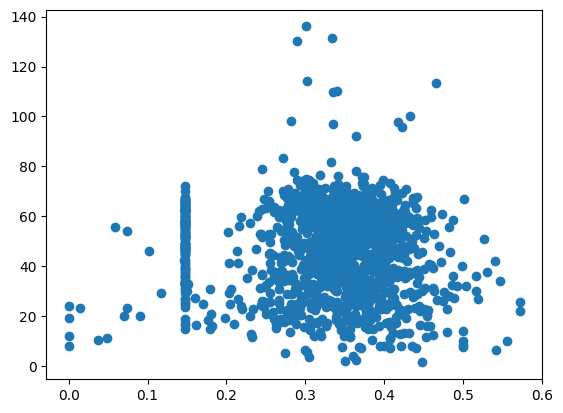

In [14]:
plt.scatter(x, y)

In [15]:
# Predict on the original data
y_pred = poly_model.predict(z[:, np.newaxis])

# Plot the polynomial fit
plt.plot(z, y_pred, color='red', label=f'Polynomial Fit (Degree {degree})')

# Add labels and legend
plt.xlabel('Average Length')
plt.ylabel('Average Score')
plt.legend()

# Show the plot
plt.show()

# Show the plot
plt.show()

NameError: name 'poly_model' is not defined

In [ ]:
result1 = pd.merge(average_score, average_gram, on='student_id', how='inner').fillna(0)
a = result1["average_gram"]
y = result1["average_score"]
plt.scatter(a, y)